In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [157]:
data=pd.read_excel("D:\\fortray\\1645792390_cep1_dataset.xlsx")

In [158]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [159]:
data.shape

(303, 14)

In [160]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [161]:
data.duplicated().sort_values()

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

In [162]:
data.drop_duplicates(inplace=True)
data.duplicated().any()

False

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [164]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [165]:
import pandas_profiling as pp
pp.ProfileReport(data)

In [166]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [167]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarn

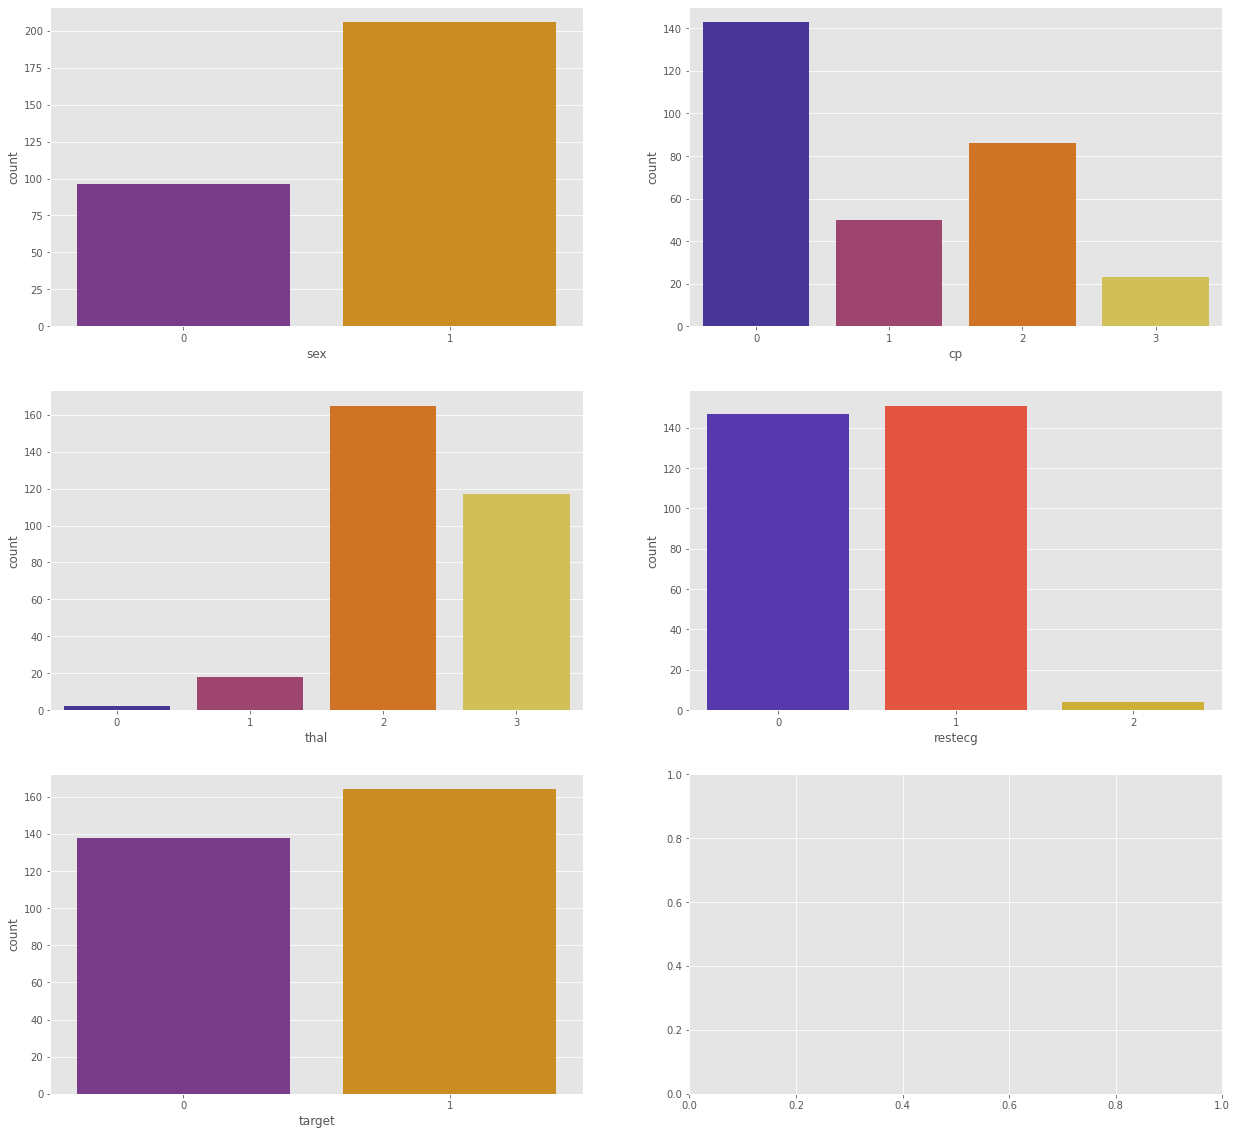

In [176]:
fig,axes = plt.subplots(3,2, figsize=(21,20))
s=sns.countplot('sex',data=data,ax=axes[0,0],palette='CMRmap')
c=sns.countplot('cp',data=data,ax=axes[0,1],palette='CMRmap')
r=sns.countplot('restecg',data=data,ax=axes[1,1],palette='CMRmap')
t=sns.countplot('thal',data=data,ax=axes[1,0],palette='CMRmap')
ta=sns.countplot('target',data=data,ax=axes[2,0],palette='CMRmap')


# Next we are using boxplot to check the outliers in the data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



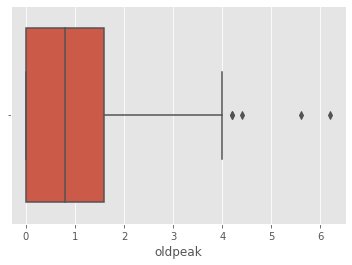

In [172]:
sns.boxplot(data["oldpeak"])

In [ ]:
#We can see there are outliers present in oldpeak data.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



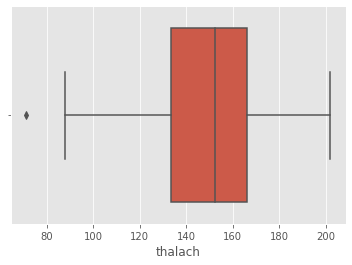

In [173]:
sns.boxplot(data["thalach"])

In [ ]:
#there are no ooutliers in thalach.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



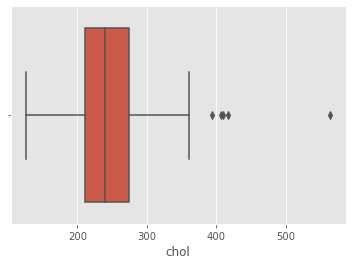

In [174]:
sns.boxplot(data["chol"])

In [ ]:
# There are outliers present in chol.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



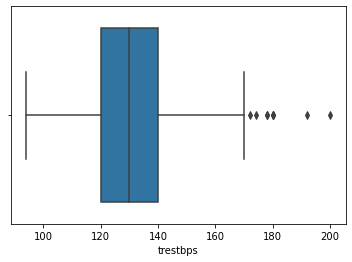

In [129]:
sns.boxplot(data["trestbps"])

In [ ]:
#There are anomalies in trestbps.

In [132]:
#Let's see if anamolies corresponds to CVD?
filt1=data['trestbps']>170
data.loc[filt1][['trestbps','target']]

trestbps  target
8         172       1
101       178       1
110       180       1
203       180       0
223       200       0
241       174       0
248       192       0
260       178       0
266       180       0

In [ ]:
#Now we have to remove the outliers.

In [180]:
for x in ['chol']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



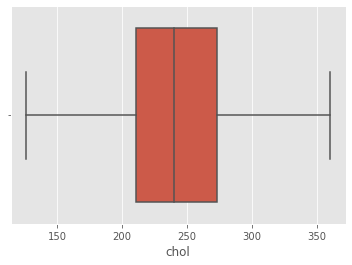

In [181]:
sns.boxplot(data["chol"])

In [183]:
for x in ['trestbps']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



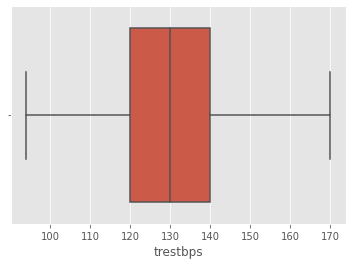

In [184]:
sns.boxplot(data["trestbps"])

In [185]:
for x in ['oldpeak']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



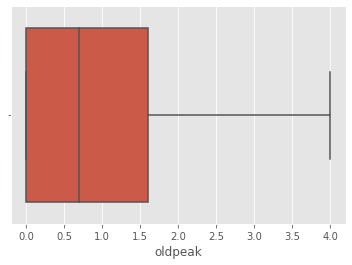

In [186]:
sns.boxplot(data["oldpeak"])

In [ ]:
#HEnce all the outliers are removed thorugh IQR method.

In [189]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    9
chol        5
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

In [194]:
data.dropna(inplace=True)

In [195]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#ALl the nan values are also removed

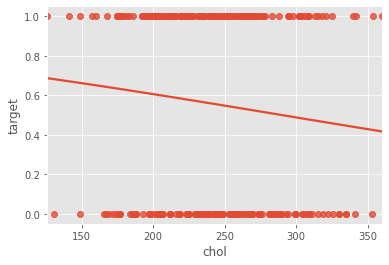

In [196]:
sns.regplot(x='chol', y='target', data=data, logistic=True, ci=None)

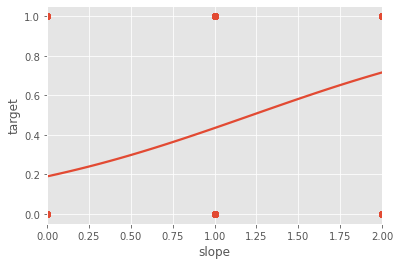

In [197]:
sns.regplot(x='slope', y='target', data=data, logistic=True, ci=None)

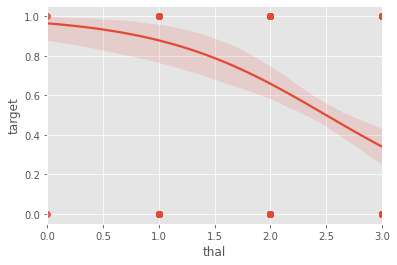

In [198]:
sns.regplot(x='thal', y='target', data=data, logistic=True)

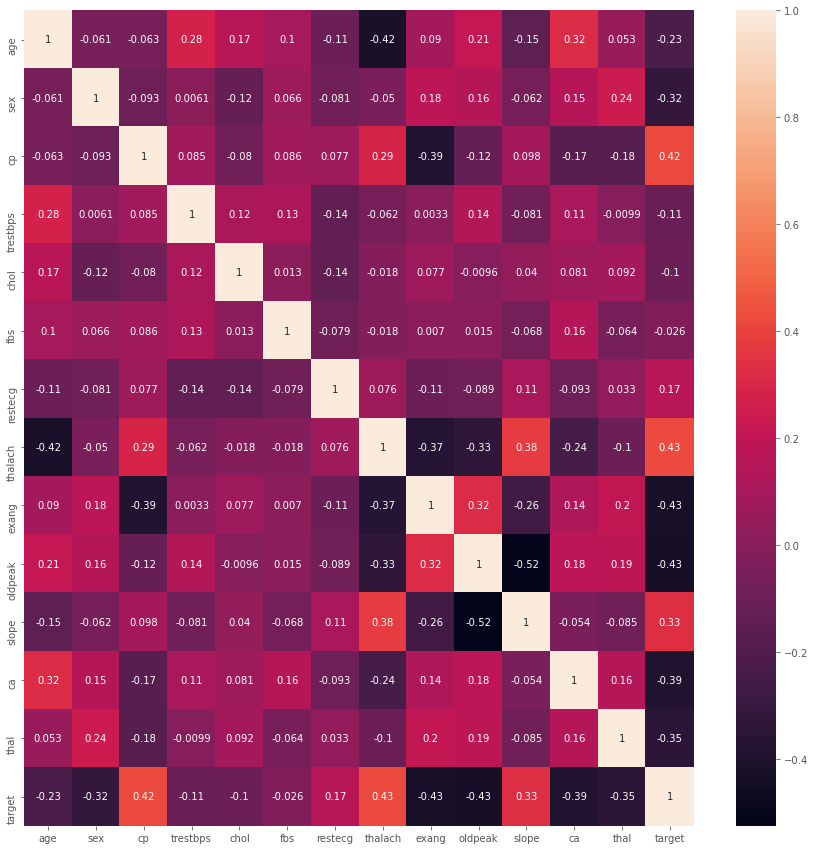

In [ ]:
#HEre there are no highly correlated columns. Hence we are not dropping any.

In [200]:
data.columns
#y=data[["target"]]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [201]:
x=data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]]

In [202]:
y=data[["target"]]


In [203]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [204]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((190, 13), (94, 13), (190, 1), (94, 1))

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [206]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [207]:
#fit the data
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [208]:
y_pred=LogReg.predict(X_test)

In [209]:
metrics.confusion_matrix(y_test,y_pred)

array([[30, 10],
       [ 8, 46]], dtype=int64)

In [210]:
metrics.accuracy_score(y_test,y_pred)

0.8085106382978723

In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.82      0.85      0.84        54

    accuracy                           0.81        94
   macro avg       0.81      0.80      0.80        94
weighted avg       0.81      0.81      0.81        94



In [213]:
from sklearn.ensemble import RandomForestClassifier
X_train2,X_test2,y_train2,y_test2=train_test_split(x,y, test_size=0.3,random_state=1)

In [214]:
scaler=MinMaxScaler()
X_train2= scaler.fit_transform(X_train2)
X_test2= scaler.transform(X_test2)

In [215]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train2,y_train2)
y_pred2=rf.predict(X_test2)

<ipython-input-215-1d1731b12457>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [216]:
metrics.confusion_matrix(y_test2,y_pred2)

array([[27, 13],
       [ 5, 41]], dtype=int64)

In [217]:
metrics.accuracy_score(y_test2,y_pred2)

0.7906976744186046

In [218]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        40
           1       0.76      0.89      0.82        46

    accuracy                           0.79        86
   macro avg       0.80      0.78      0.79        86
weighted avg       0.80      0.79      0.79        86



In [219]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.284814
         Iterations 8


In [220]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  190
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.5864
Time:                        13:42:46   Log-Likelihood:                -54.115
converged:                       True   LL-Null:                       -130.84
Covariance Type:            nonrobust   LLR p-value:                 1.125e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4069      1.219      1.154      0.248      -0.982       3.796
x2            -1.3716      0.665     -2.063      0.039      -2.675      -0.069
x3             3.5691      0.887      4.026      0.0

In [221]:
logreg_pred = logreg.predict(X_test)
preds = list(map(round, logreg_pred))

Accuracy score 0.7978723404255319
Recall score 0.8333333333333334
Precision score 0.8181818181818182
f1 score 0.8256880733944955


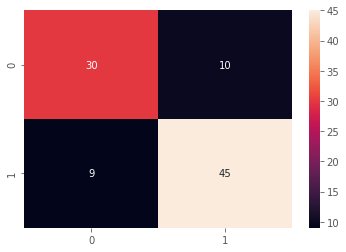

In [222]:
print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

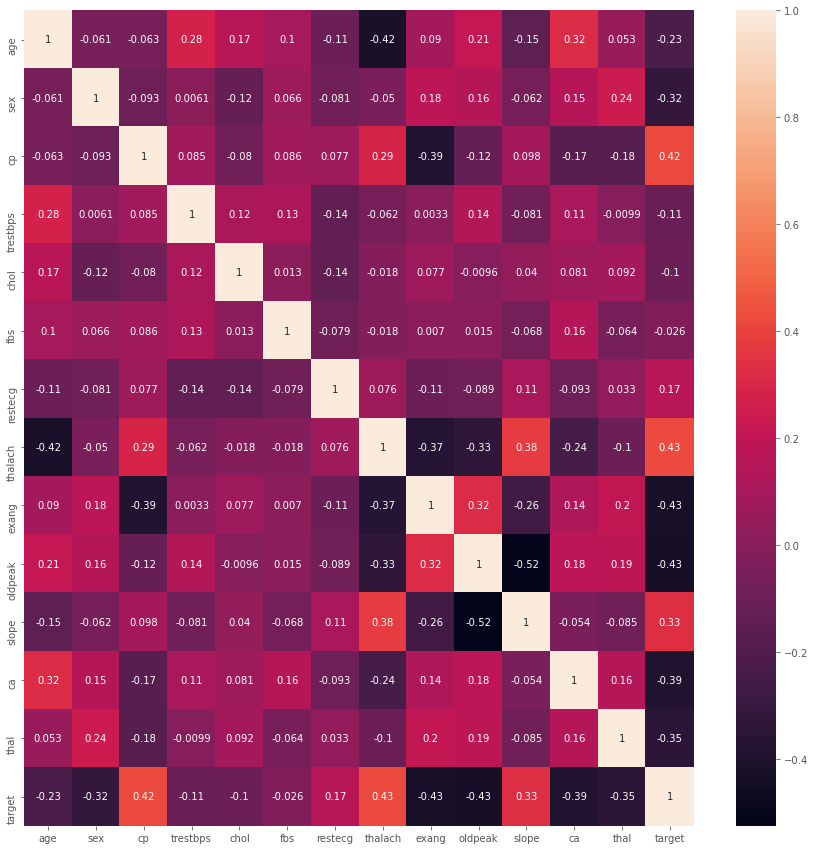

In [233]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

In [223]:
#sex, cp, thalach, exang, ca, thal, chol, age will be the features we will pick

In [225]:
new_features = ['sex','cp','thalach','exang','ca','thal','chol']
new_X = data[new_features]
new_X.head()

sex  cp  thalach  exang  ca  thal   chol
0    1   3      150      0   0     1  233.0
1    1   2      187      0   0     2  250.0
2    0   1      172      0   0     2  204.0
3    1   1      178      0   0     2  236.0
4    0   0      163      1   0     2  354.0

In [226]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

In [227]:
print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (198, 7)
X1_test : (86, 7)
y1_train: (198, 1)
y1_test : (86, 1)


In [228]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.408974
         Iterations 7


In [229]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  198
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.4013
Time:                        13:45:20   Log-Likelihood:                -80.977
converged:                       True   LL-Null:                       -135.26
Covariance Type:            nonrobust   LLR p-value:                 4.082e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.7876      0.490     -3.648      0.000      -2.748      -0.827
cp             0.5679      0.193      2.938      0.003       0.189       0.947
thalach        0.0343      0.008      4.386      0.0

In [230]:
logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

Accuracy score 0.8372093023255814
Recall score 0.8444444444444444
Precision score 0.8444444444444444
f1 score 0.8444444444444444


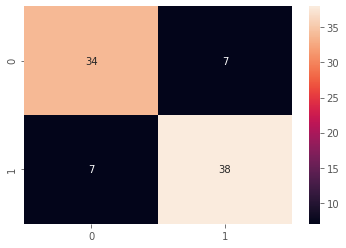

In [231]:
print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))
cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

In [232]:
rfc1 = RandomForestClassifier(random_state=6)
cv_score1 = cross_val_score(rfc1, new_X, y, cv=5)
print(cv_score1)
print('\nAverage score: ',cv_score1.mean())

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\user\anaconda3\lib\

[0.77192982 0.89473684 0.8245614  0.8245614  0.75      ]

Average score:  0.8131578947368421
